In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [112]:
barriers_df = pd.read_csv("Resources\CVAC_data_Feb2021.csv")
barriers_df.head()

,FIPS,State,Th1_Historic_Undervaccination,Th2_Sociodemographic_Barriers,Th3_Resource_constrained_Healthcare_System,Th4_Healthcare_Accessibility_Barriers,Th5_Irregular_Care_Seeking_Behavior,CVAC
0,1,Alabama,0.36,0.88,0.52,0.96,0.80,0.78
1,2,Alaska,0.98,0.16,0.14,0.98,0.96,0.70
2,4,Arizona,0.92,0.52,0.96,0.38,0.92,0.88
3,5,Arkansas,0.34,0.96,0.74,0.88,0.78,0.88
4,6,California,0.80,0.44,0.80,0.08,0.96,0.68


In [142]:
# top_states_barriers_df = barriers_df.loc[['California', 'Texas', 'New York', 'Florida', 'Illinois']]

top5_barriers = barriers_df.loc[['California', 'Texas', 'New York', 'Florida', 'Illinois'], :]

# states_icked = vacc_data_df.loc[['CA', 'TX', 'NY', 'FL', 'IL','SD', 'DC', 'AK', 'ND', 'WY'], :]
top5_barriers.head()

KeyError: "None of [Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')] are in the [index]"

In [113]:
deaths_vaccstatus_df = pd.read_csv("Resources\cases_and_deaths_by_vaccination_status.csv")
deaths_vaccstatus_df.head()

,outcome,month,mmwr_week,week_date,age_group,vaccine_product,crude_vax_ir,crude_unvax_ir,crude_irr
0,case,04 - APR,14,Apr 04-Apr 10,12-17,all_types,14.021312,231.534316,16.513027
1,case,04 - APR,14,Apr 04-Apr 10,18-29,all_types,33.231686,274.515844,8.260666
2,case,04 - APR,14,Apr 04-Apr 10,30-49,all_types,30.460406,250.979057,8.239518
3,case,04 - APR,14,Apr 04-Apr 10,50-64,all_types,26.446469,192.311420,7.271724
4,case,04 - APR,14,Apr 04-Apr 10,65-79,all_types,13.722635,159.418827,11.617217


In [114]:
hospitilizations_df = pd.read_csv(r"Resources\associated_hospitalizations_by_vaccine_status_in_adults_january-august_2021.csv")
hospitilizations_df.head()

,Week ending,Age group,Rate in unvaccinated,Rate in fully vaccinated
0,1/30/21,65+ yr,34.4,0.0
1,1/30/21,50-64 yr,21.2,1.2
2,1/30/21,18-49 yr,6.3,0.0
3,2/6/21,65+ yr,43.2,6.4
4,2/6/21,50-64 yr,15.4,0.0


In [115]:
# COVID19 Case Surveillance

covid19_surv_url = "https://data.cdc.gov/resource/n8mc-b4w4.json"
response1 = requests.get(covid19_surv_url)
response1


<Response [200]>

In [116]:
response1.json()

[{'case_month': '2020-11',
  'res_state': 'IN',
  'state_fips_code': '18',
  'res_county': 'POSEY',
  'county_fips_code': '18129',
  'age_group': '0 - 17 years',
  'sex': 'NA',
  'race': 'NA',
  'ethnicity': 'NA',
  'case_positive_specimen': '0',
  'process': 'Missing',
  'exposure_yn': 'Missing',
  'current_status': 'Laboratory-confirmed case',
  'symptom_status': 'Missing',
  'hosp_yn': 'Missing',
  'icu_yn': 'Missing',
  'death_yn': 'No'},
 {'case_month': '2021-03',
  'res_state': 'KY',
  'state_fips_code': '21',
  'res_county': 'WOODFORD',
  'county_fips_code': '21239',
  'age_group': '0 - 17 years',
  'sex': 'NA',
  'race': 'NA',
  'ethnicity': 'NA',
  'case_onset_interval': '0',
  'process': 'Missing',
  'exposure_yn': 'Missing',
  'current_status': 'Laboratory-confirmed case',
  'symptom_status': 'Symptomatic',
  'hosp_yn': 'No',
  'icu_yn': 'Missing',
  'death_yn': 'No'},
 {'case_month': '2020-08',
  'res_state': 'MI',
  'state_fips_code': '26',
  'res_county': 'ANTRIM',
  'cou

In [117]:
# Vaccination and Case Trends by Age

covid19_vacc_trends_url = "https://data.cdc.gov/resource/rh2h-3yt2.json"
response2 = requests.get(covid19_vacc_trends_url)
response2

<Response [200]>

In [123]:
vacc_data_df= pd.read_json(covid19_vacc_trends_url)

states_icked = vacc_data_df.loc[['CA', 'TX', 'NY', 'FL', 'IL','SD', 'DC', 'AK', 'ND', 'WY'], :]
vacc_data_df.head()

In [119]:
location_groups = vacc_data_df.groupby("location")
location_groups.sum()

location_groups_clean = location_groups[['location','admin_dose_1_cumulative','series_complete_cumulative']]
location_groups_sum = location_groups_clean.sum()

location_groups_sum.sort_values(by=['series_complete_cumulative'], ascending=False).head()

,admin_dose_1_cumulative,series_complete_cumulative
location,,
US,3531251087,3041895727
CA,496948367,408981245
TX,308804501,261384357
NY,229655411,206132706
FL,238444101,204202896


In [134]:
top_states_df = location_groups_sum.loc[['CA', 'TX', 'NY', 'FL', 'IL']]
bottom_states_df = location_groups_sum.loc[['SD', 'VT', 'AK', 'ND', 'WY']]

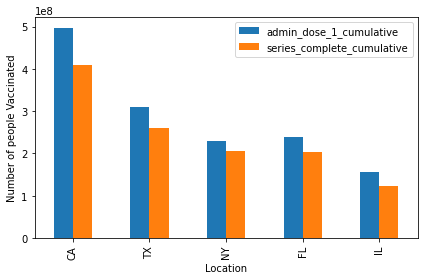

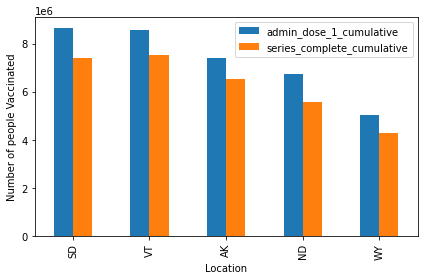

In [135]:
top_states_df.plot(kind="bar")
plt.xlabel("Location")
plt.ylabel("Number of people Vaccinated")

plt.tight_layout()
plt.show()

bottom_states_df.plot(kind="bar")
plt.xlabel("Location")
plt.ylabel("Number of people Vaccinated")

plt.tight_layout()
plt.show()